In [18]:
# Import required Libraries 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# download problem data 
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-03-18 09:56:04--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-03-18 09:56:04 (46.1 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [20]:
# read csv file and save data 
data = pd.read_csv('moore.csv', header=None)
data.head

<bound method NDFrame.head of         0            1
0    1971         2300
1    1972         3500
2    1973         2500
3    1973         2500
4    1974         4100
..    ...          ...
157  2017  18000000000
158  2017  19200000000
159  2018   8876000000
160  2018  23600000000
161  2018   9000000000

[162 rows x 2 columns]>

In [21]:
# create input and target data 
data_arr = data.values
x = data_arr[:,0].reshape(-1,1)
y = data_arr[:,1]

In [22]:
x.shape

(162, 1)

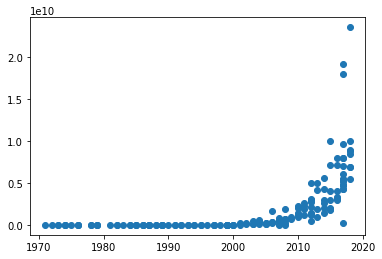

In [23]:
# plot data in scatter plot
plt.scatter(x,y)

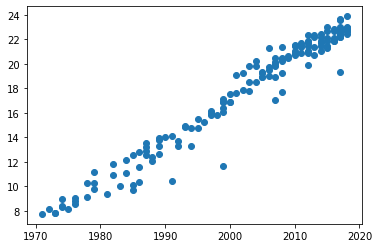

In [24]:
# we change it into linear relation 
y = np.log(y)
# replot 
plt.scatter(x,y)

In [25]:
# we scale date x data 
# we can use standard scaler but we try with substracting from mean
x = x - x.mean()

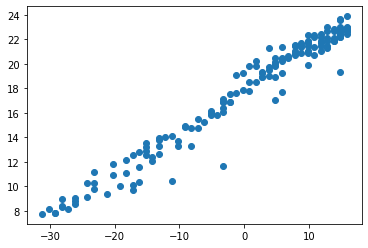

In [26]:
plt.scatter(x,y)

In [44]:
###### building the tf dense model
model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(1,)),
            tf.keras.layers.Dense(1)
])

# WE USE SGD for this problem and specify lr and momentum 
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr): 
  if epoch >= 30: 
    return 0.00001
  else: 
    return 0.001

schedular = tf.keras.callbacks.LearningRateScheduler(schedule)


r = model.fit(x, y, epochs=400, callbacks =[schedular])


Epoch 1/400
6/6 [==============================] - 0s 2ms/step - loss: 468.5507 - lr: 0.0010
Epoch 2/400
6/6 [==============================] - 0s 3ms/step - loss: 347.0287 - lr: 0.0010
Epoch 3/400
6/6 [==============================] - 0s 3ms/step - loss: 248.4410 - lr: 0.0010
Epoch 4/400
6/6 [==============================] - 0s 3ms/step - loss: 277.6448 - lr: 0.0010
Epoch 5/400
6/6 [==============================] - 0s 3ms/step - loss: 179.4693 - lr: 0.0010
Epoch 6/400
6/6 [==============================] - 0s 3ms/step - loss: 127.2872 - lr: 0.0010
Epoch 7/400
6/6 [==============================] - 0s 2ms/step - loss: 87.2134 - lr: 0.0010
Epoch 8/400
6/6 [==============================] - 0s 2ms/step - loss: 111.1759 - lr: 0.0010
Epoch 9/400
6/6 [==============================] - 0s 2ms/step - loss: 76.5206 - lr: 0.0010
Epoch 10/400
6/6 [==============================] - 0s 2ms/step - loss: 59.4942 - lr: 0.0010
Epoch 11/400
6/6 [==============================] - 0s 3ms/step - loss: 

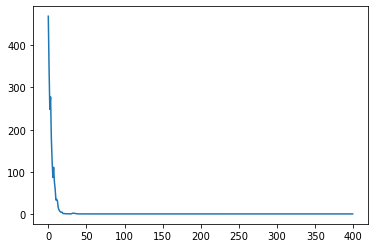

In [45]:
plt.plot(r.history['loss'], label='train_loss')

In [46]:
# get model weights 
print(model.weights)

[<tf.Variable 'dense_7/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.3404196]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([17.649078], dtype=float32)>]


In [47]:
# Regression Linear model has 2 vars representing straight line vars
# first weight is the slope 0.3222404 and b = 17.744345
# to acess the slope 
m = model.layers[0].get_weights()[0][0,0]
# we acess the model layers 
# we get hold of first dense layer (input layer is ignored)
# we get the array of weights of first layer 
# we acess the weight we want 

In [48]:
m

0.3404196

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [49]:
print("Time to double:", np.log(2) / m)

Time to double: 2.0361553798842404


In [50]:
# If you know the analytical solution
X = np.array(x).flatten()
Y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204
